In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import torch.nn as nn
import torch.optim as optim

In [69]:
train=pd.read_csv('train.csv')
valid=pd.read_csv('valid.csv')
test=pd.read_csv('test.csv')

In [70]:
X_train = torch.tensor(train['PT08.S1(CO)'].values.reshape(-1,1), dtype=torch.float32)
y_train = torch.tensor(train['CO(GT)'], dtype=torch.float32).view(-1,1)


X_valid = torch.tensor(valid['PT08.S1(CO)'].values.reshape(-1,1), dtype=torch.float32)
y_valid = torch.tensor(valid['CO(GT)'], dtype=torch.float32).view(-1,1)


X_test = torch.tensor(test['PT08.S1(CO)'].values.reshape(-1,1), dtype=torch.float32)
y_test = torch.tensor(test['CO(GT)'], dtype=torch.float32).view(-1,1)

In [71]:
X_train

tensor([[1181.],
        [1070.],
        [1086.],
        ...,
        [ 809.],
        [ 922.],
        [1005.]])

In [72]:
class NeuralNet(nn.Module ):
    def __init__( self, input_size, hidden1):
        super(). __init__ ()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.Sigmoid(),
            nn.Linear(hidden1, 1)
            )
    
    def forward(self, x ):
        return self.layers(x)


In [73]:
hidden_layers = [8, 16, 32, 64]
best_modal = None
best_rmse=float('inf')
loss_history = {}
epochs = 100
y_test_pred_seq ={}
y_train_rmse ={}
y_test_rmse ={}
y_valid_rmse ={}

In [74]:
for hidden in hidden_layers:
    model = NeuralNet(input_size=1, hidden1=hidden)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    losses=[]

    for epoch in range(100):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss =criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    loss_history[hidden] =losses
    
    y_test_pred = model(X_test).detach().numpy()
    y_valid_pred = model(X_valid).detach().numpy()
    y_train_pred = model(X_train).detach().numpy()

    y_test_pred_seq[hidden] = y_test_pred

    rmse_val = sqrt(mean_squared_error(y_valid_pred, y_valid))
    y_train_rmse[hidden] = sqrt(mean_squared_error(y_train, y_train_pred))
    y_valid_rmse[hidden] = sqrt(mean_squared_error(y_valid, y_valid_pred))
    y_test_rmse[hidden] = sqrt(mean_squared_error(y_test, y_test_pred))
    
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_model = model

In [75]:
best_rmse

1.5187028131886064

In [76]:
best_model

NeuralNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=16, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [77]:
print("From above we got best model as hidden layer 16 (from output of best_model)")
print(f"RMSE for training data: {y_train_rmse[16]}")
print(f"RMSE for validation data: {y_valid_rmse[16]}")
print(f"RMSE for test data: {y_test_rmse[16]}")


From above we got best model as hidden layer 16 (from output of best_model)
RMSE for training data: 1.427154966166896
RMSE for validation data: 1.5187028131886064
RMSE for test data: 1.4686959439333651


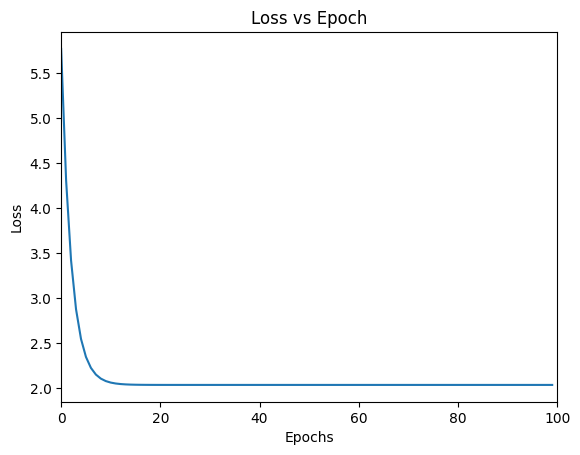

In [78]:
plt.plot(range(epochs), loss_history[16])
plt.xlim(0, 100)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

In [79]:
# model_best = NeuralNet(input_size=1, hidden1=16)
# criterion_best = nn.MSELoss()
# optimizer_best = optim.SGD(model_best.parameters(), lr=0.01)

# losses_best=[]

# for epoch in range(epochs):
#     optimizer_best.zero_grad()
#     y_pred_best = model(X_train)
#     loss_best =criterion(y_pred_best, y_train)
#     loss_best.backward()
#     optimizer_best.step()

#     losses_best.append(loss.item())

# y_train_pred_best = model(X_train).detach().numpy()
# y_test_pred_best = model(X_test).detach().numpy()
# y_valid_pred_best = model(X_valid).detach().numpy()

# y_train_rmse_best = sqrt(mean_squared_error(y_train, y_train_pred_best))
# y_valid_rmse_best = sqrt(mean_squared_error(y_valid, y_valid_pred_best))
# y_test_rmse_best = sqrt(mean_squared_error(y_test, y_test_pred_best))

# print(f"RMSE for training data: {y_train_rmse_best}")
# print(f"RMSE for validation data: {y_valid_rmse_best}")
# print(f"RMSE for test data: {y_test_rmse_best}")

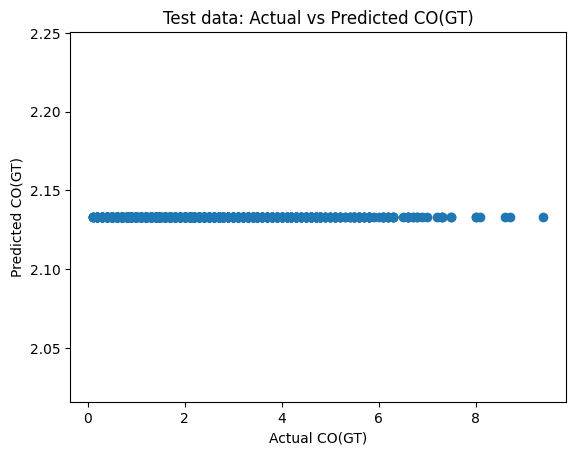

In [80]:
plt.scatter(y_test, y_test_pred_seq[16])
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Test data: Actual vs Predicted CO(GT)")

plt.show()